# **TRANSFORMAÇÃO E DIFERENCIAÇÃO**

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6

### **Transformação**

**AirPassengers: dados clássicos da companhia aérea Box & Jenkins. Totais mensais de passageiros de companhias aéreas internacionais, 1949 a 1960.**
 

In [39]:
dados = pd.read_csv('D:/Python/Series_Temporais/AirPassengers.csv',
                    sep=',')

In [40]:
dados

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [41]:
serie = pd.Series(dados['#Passengers'].values, index = dados['Month'])
serie

Month
1949-01    112
1949-02    118
1949-03    132
1949-04    129
1949-05    121
          ... 
1960-08    606
1960-09    508
1960-10    461
1960-11    390
1960-12    432
Length: 144, dtype: int64

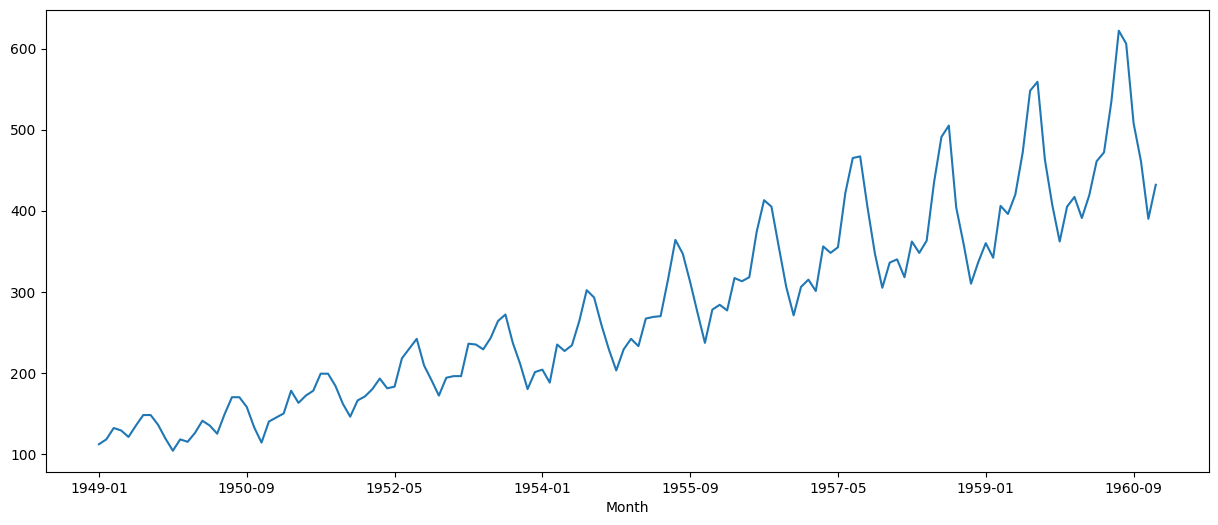

In [42]:
serie.plot()
plt.show()

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose

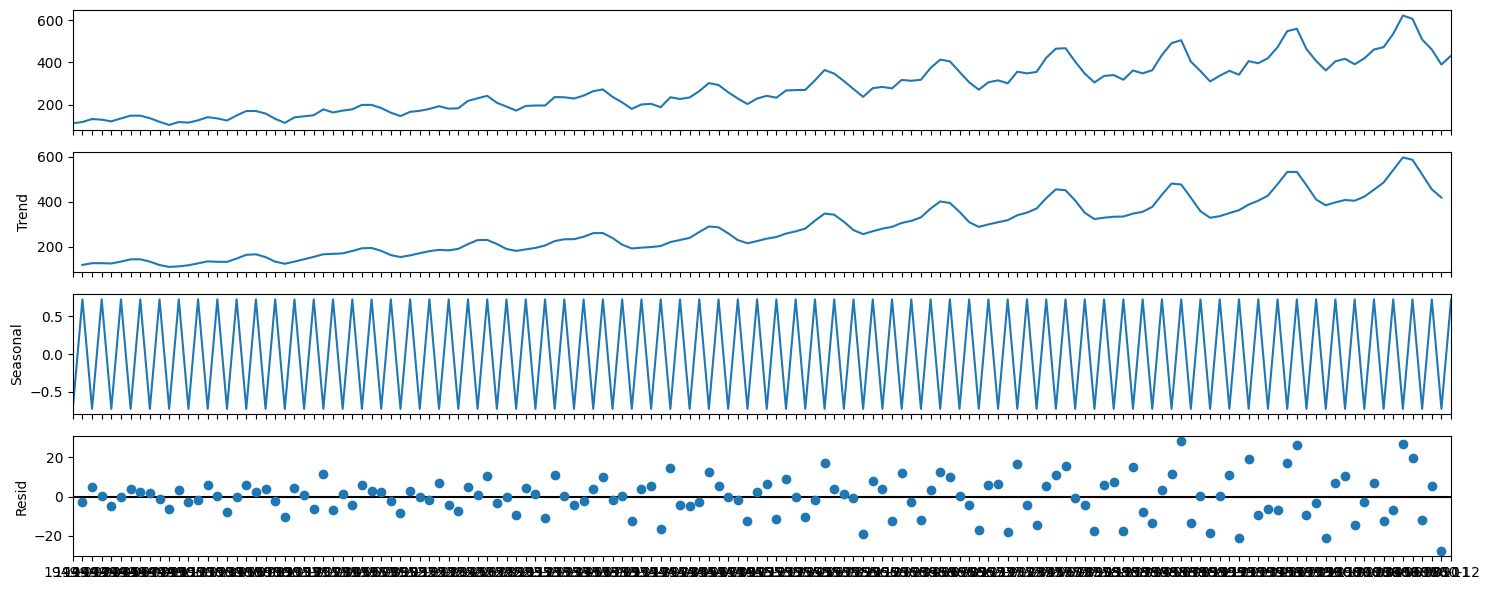

In [44]:
decomposicao = seasonal_decompose(serie, period=2)
decomposicao.plot();

In [45]:
import scipy.stats as stats

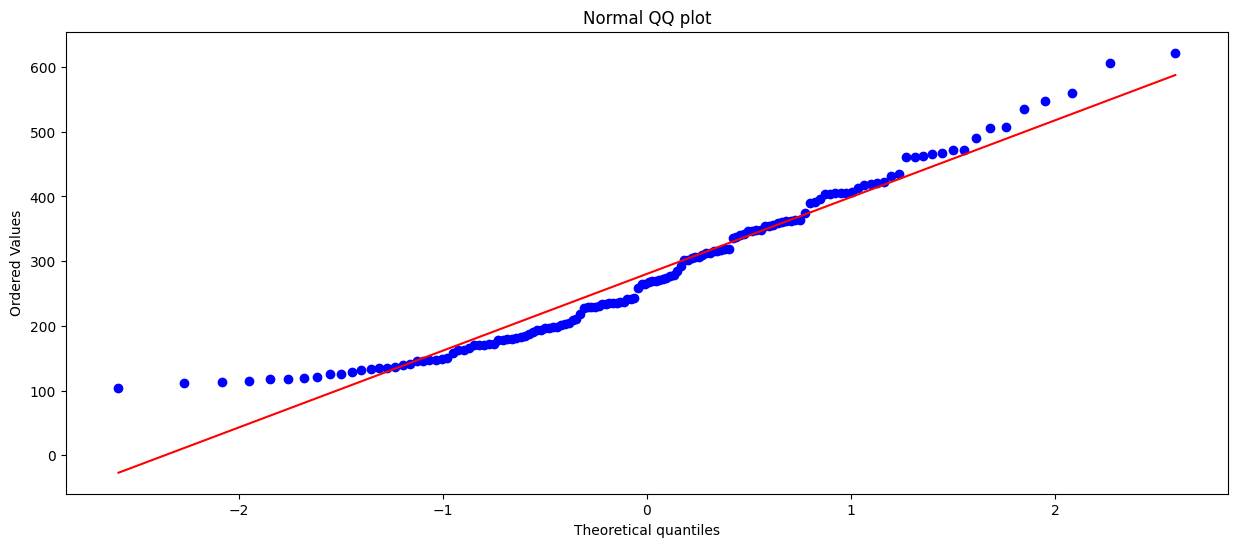

In [46]:
stats.probplot(serie, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

**Teste Shapiro-Wilk**

CRITÉRIOS:

NÍVEL DE SIGNIFICÂNCIA DE 0,05 ou 5% (MAIS UTILIZADO)

QUANDO p > 0,05 (distribuição normal).

In [47]:
e, p = stats.shapiro(serie)
print('Estatística de teste: {}'.format(e))
print('p-valor: {}'.format(p))

Estatística de teste: 0.9519579410552979
p-valor: 6.832739018136635e-05


In [48]:
# Transformação por log (Diminuir variância e melhorar normalidade)
serie2 = np.log(serie)
serie2

Month
1949-01    4.718499
1949-02    4.770685
1949-03    4.882802
1949-04    4.859812
1949-05    4.795791
             ...   
1960-08    6.406880
1960-09    6.230481
1960-10    6.133398
1960-11    5.966147
1960-12    6.068426
Length: 144, dtype: float64

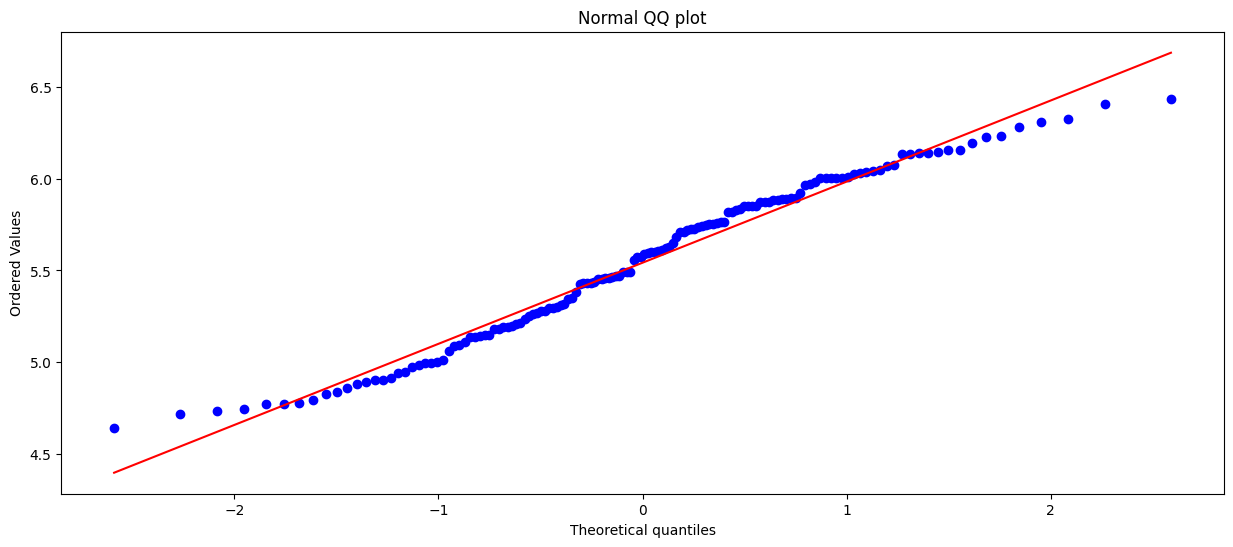

In [49]:
stats.probplot(serie2, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

**Teste Shapiro-Wilk**

CRITÉRIOS:

NÍVEL DE SIGNIFICÂNCIA DE 0,05 ou 5% (MAIS UTILIZADO)

QUANDO p > 0,05 (distribuição normal).

In [50]:
e, p = stats.shapiro(serie2)
print('Estatística de teste: {}'.format(e))
print('p-valor: {}'.format(p))

Estatística de teste: 0.9732357859611511
p-valor: 0.00637402106076479


In [51]:
# Transformação por raiz cúbica (quando possui dados com valor zero ou negativos)
serie3 = np.sign(serie)*abs(serie)**(1/3)
serie3

Month
1949-01    4.820285
1949-02    4.904868
1949-03    5.091643
1949-04    5.052774
1949-05    4.946087
             ...   
1960-08    8.462348
1960-09    7.979112
1960-10    7.725032
1960-11    7.306144
1960-12    7.559526
Length: 144, dtype: float64

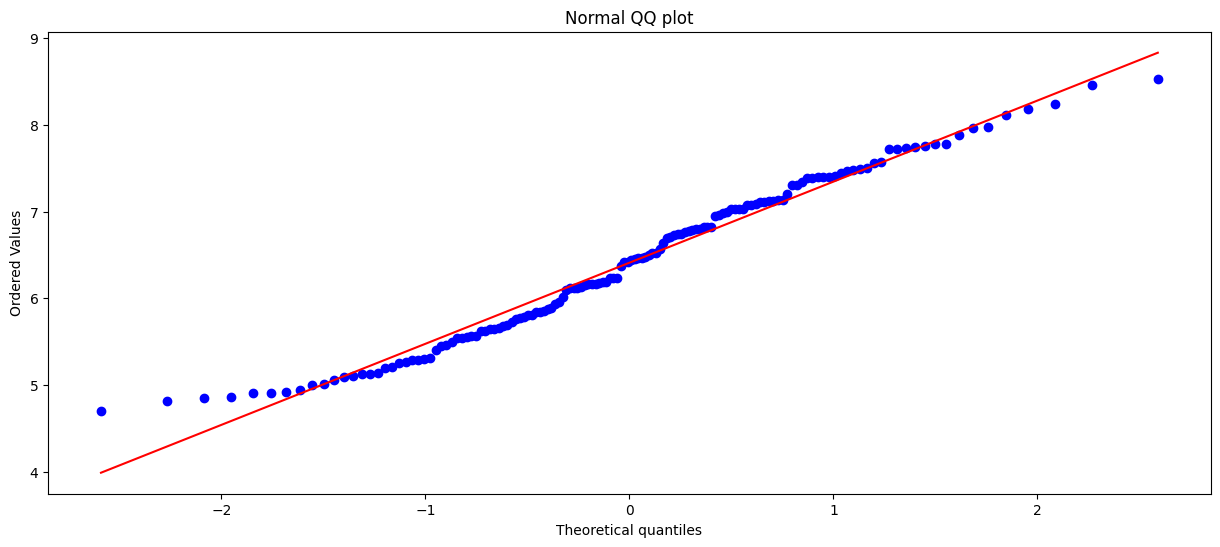

In [52]:
stats.probplot(serie3, dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()


**Teste Shapiro-Wilk**

CRITÉRIOS:

NÍVEL DE SIGNIFICÂNCIA DE 0,05 ou 5% (MAIS UTILIZADO)

QUANDO p > 0,05 (distribuição normal).

In [54]:
e, p = stats.shapiro(serie3)
print('Estatística de teste: {}'.format(e))
print('p-valor: {}'.format(p))

Estatística de teste: 0.974599301815033
p-valor: 0.008835508488118649


C:\Users\Sergio\AppData\Local\Temp\ipykernel_4700\3051758847.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(serie);


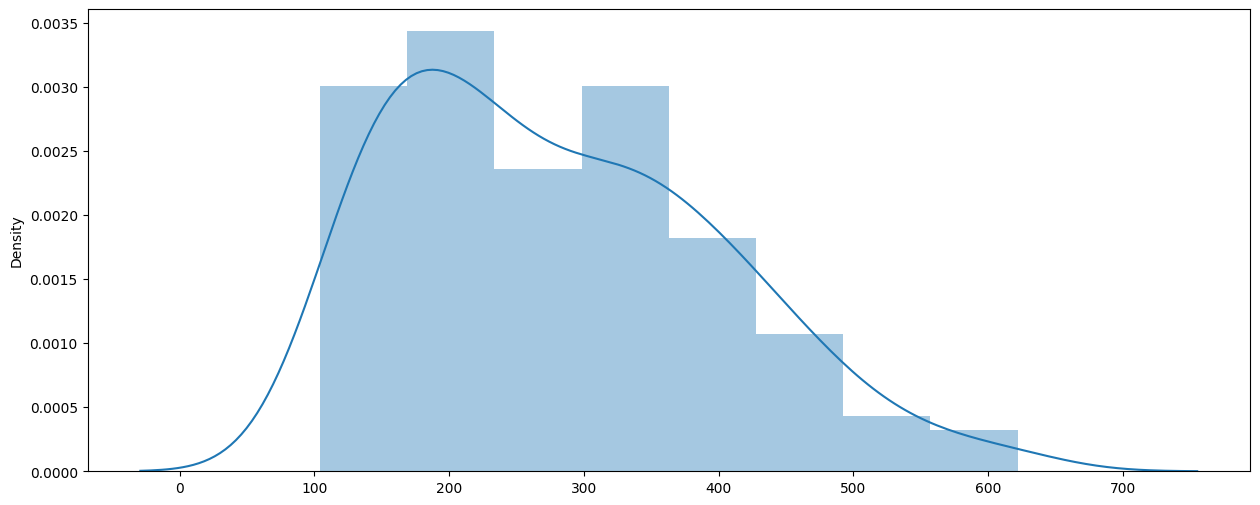

In [57]:
import seaborn as sns
sns.distplot(serie);

C:\Users\Sergio\AppData\Local\Temp\ipykernel_4700\1113069810.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(serie2);


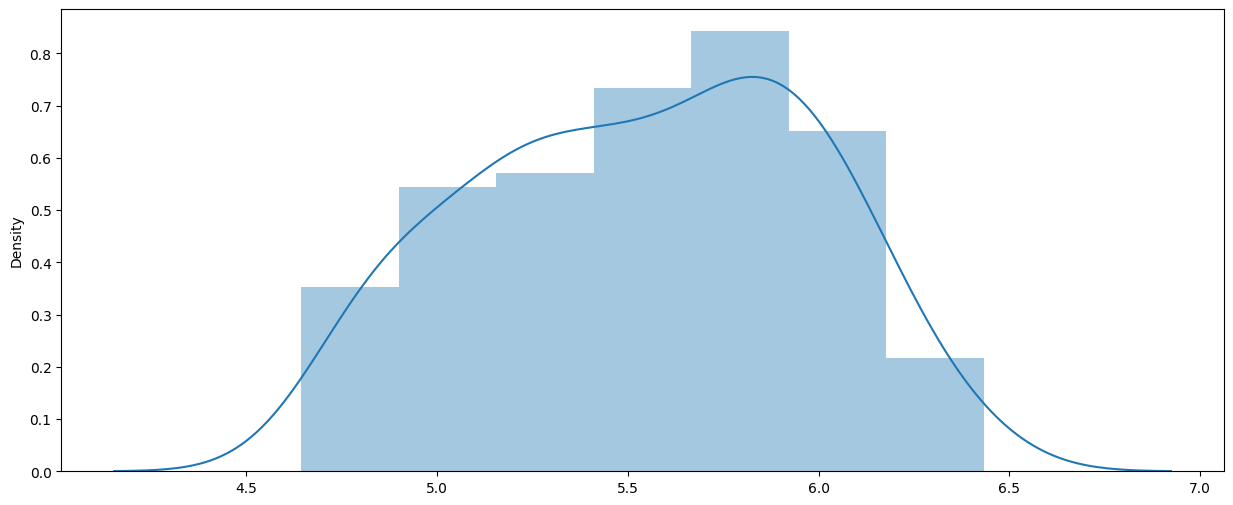

In [58]:
sns.distplot(serie2);

C:\Users\Sergio\AppData\Local\Temp\ipykernel_4700\1562955510.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(serie3);


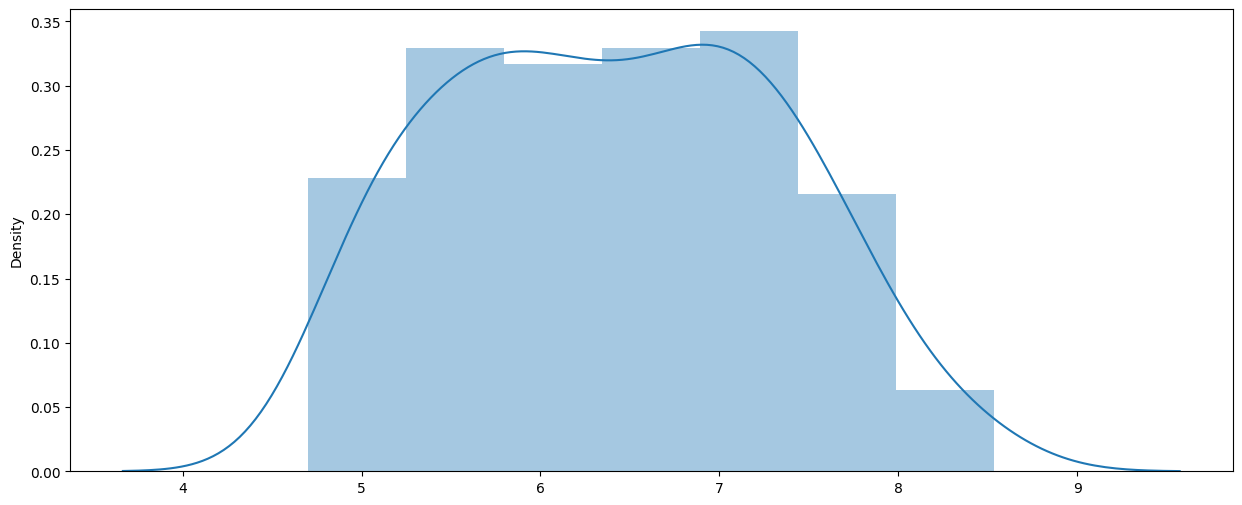

In [59]:
sns.distplot(serie3);

### **DIFERENCIAÇÃO**

In [60]:
import statsmodels.tsa.stattools

Teste KPSS (Kwiatkowski-Phillips-Schmidt-Shin)

Ho = não é estacionário: estatística do teste > valor crítico

Ha = é estacionário:  estatística do teste < valor crítico

In [61]:
kpss = statsmodels.tsa.stattools.kpss(serie3)
print('Estatítica do teste: {:.4f}'.format(kpss[0]))
print('p_valor: {:.4f}'.format(kpss[1]))
print('Valores Críticos:')
for chave, valor in kpss[3].items():
   print('{}: {:.4f}'.format(chave, valor))

Estatítica do teste: 1.6735
p_valor: 0.0100
Valores Críticos:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390


C:\Users\Sergio\AppData\Local\Temp\ipykernel_4700\1748613426.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss = statsmodels.tsa.stattools.kpss(serie3)


Teste df (Dickey Fuller)

Ho = não é estacionário: estatística do teste > valor crítico

Ha = é estacionário:  estatística do teste < valor crítico

In [62]:
df = statsmodels.tsa.stattools.adfuller(serie3)
print('Estatítica do teste: {:.4f}'.format(df[0]))
print('p_valor: {:.8f}'.format(df[1]))
print('Valores Críticos:')
for chave, valor in df[4].items():
   print('{}: {:.4f}'.format(chave, valor))

Estatítica do teste: -0.8100
p_valor: 0.81615655
Valores Críticos:
1%: -3.4817
5%: -2.8840
10%: -2.5788


In [63]:
serie4 = np.diff(serie3)

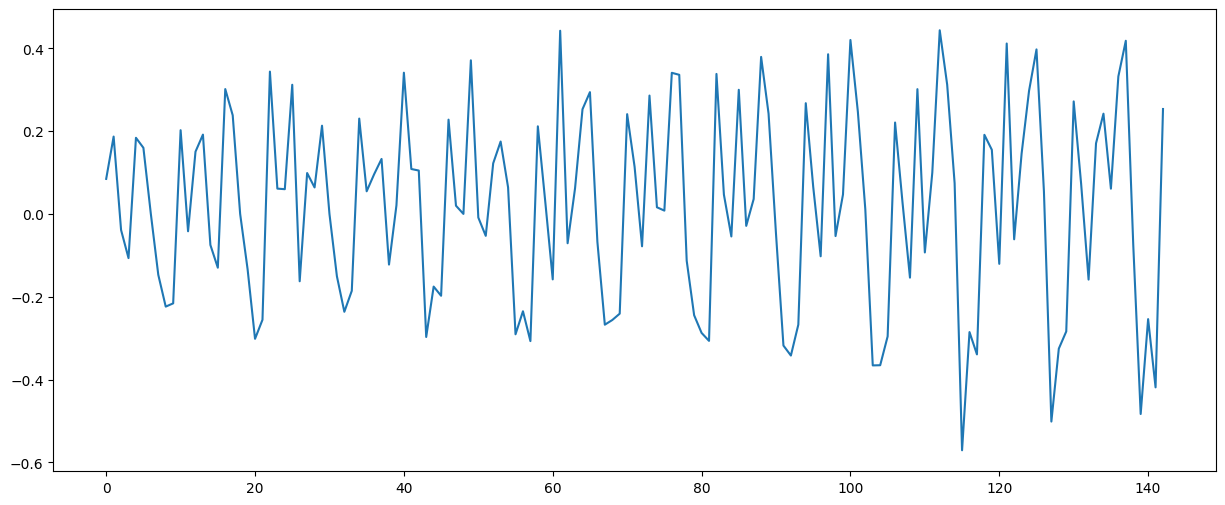

In [64]:
plt.plot(serie4)
plt.show()

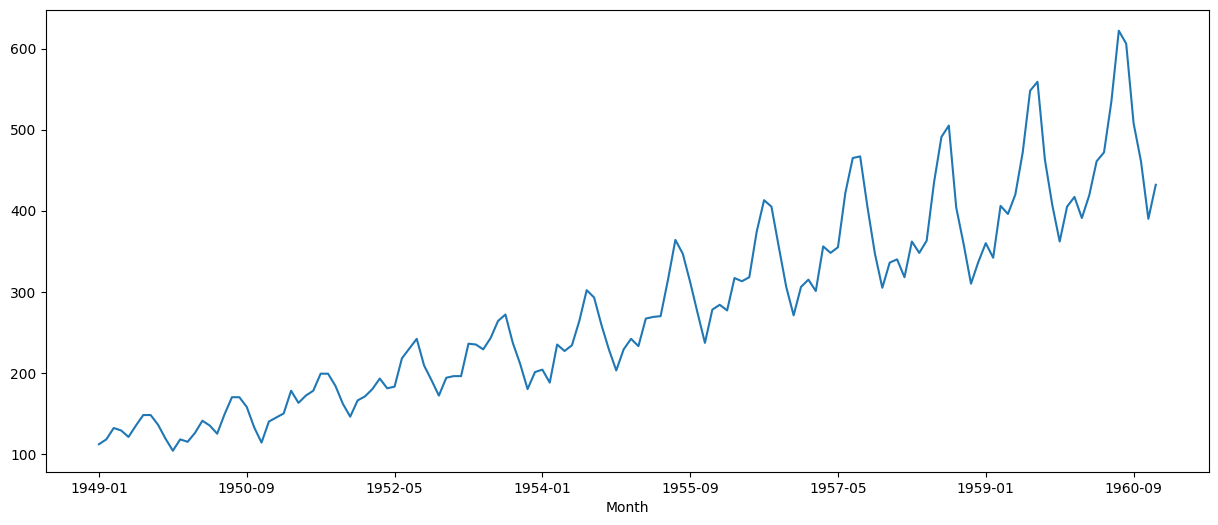

In [65]:
serie.plot()
plt.show()

In [66]:
# Cálculo da Diferenciação
#Subtração da série por um valor antecessor dela mesma
serie_diff = serie3 - serie3.shift()

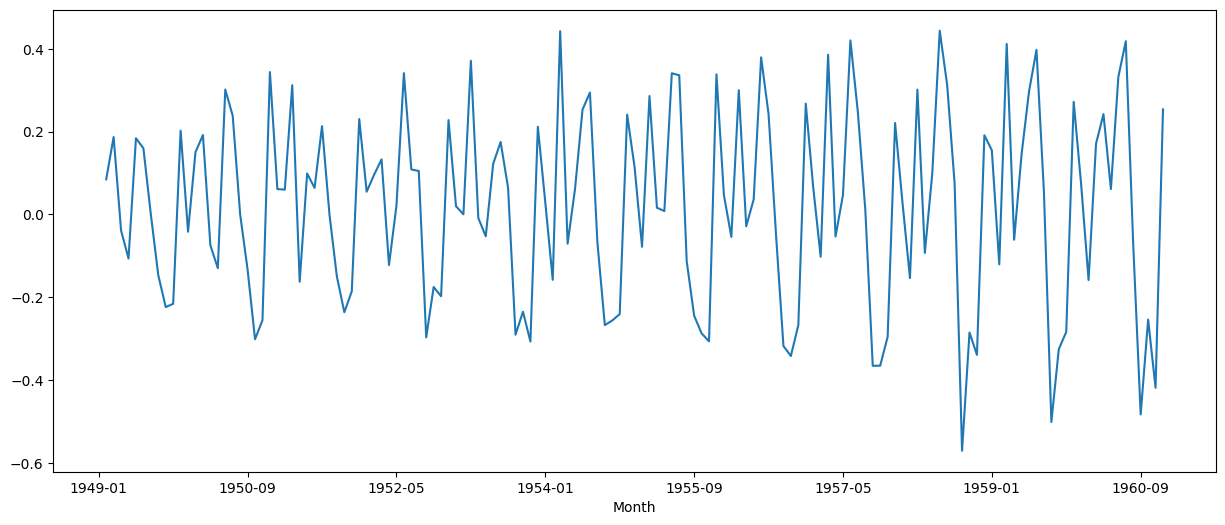

In [67]:
serie_diff.plot()
plt.show()

Teste KPSS (Kwiatkowski-Phillips-Schmidt-Shin)

Ho = não é estacionário: estatística do teste > valor crítico

Ha = é estacionário:  estatística do teste < valor crítico

In [69]:
kpss = statsmodels.tsa.stattools.kpss(serie4)
print('Estatítica do teste: {:.4f}'.format(kpss[0]))
print('p_valor: {:.4f}'.format(kpss[1]))
print('Valores Críticos:')
for chave, valor in kpss[3].items():
   print('{}: {:.4f}'.format(chave, valor))

Estatítica do teste: 0.0266
p_valor: 0.1000
Valores Críticos:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390


C:\Users\Sergio\AppData\Local\Temp\ipykernel_4700\3851743177.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss = statsmodels.tsa.stattools.kpss(serie4)


In [70]:
# Diferenciação de segunda ordem
serie5 = np.diff(serie4)

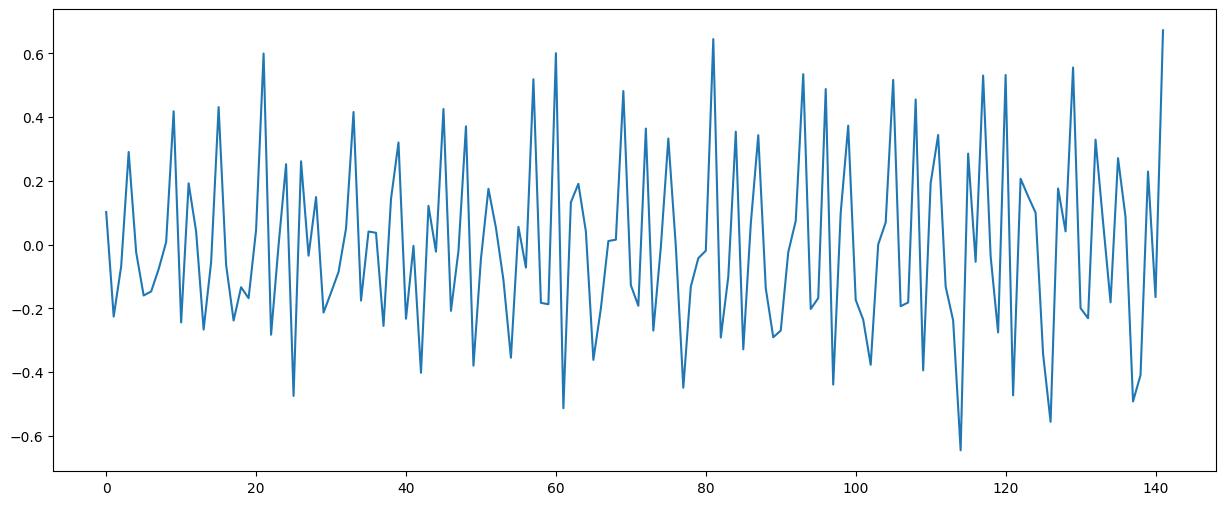

In [71]:
plt.plot(serie5)
plt.show()

In [72]:
kpss = statsmodels.tsa.stattools.kpss(serie5)
print('Estatítica do teste: {:.4f}'.format(kpss[0]))
print('p_valor: {:.4f}'.format(kpss[1]))
print('Valores Críticos:')
for chave, valor in kpss[3].items():
   print('{}: {:.4f}'.format(chave, valor))

Estatítica do teste: 0.0762
p_valor: 0.1000
Valores Críticos:
10%: 0.3470
5%: 0.4630
2.5%: 0.5740
1%: 0.7390


C:\Users\Sergio\AppData\Local\Temp\ipykernel_4700\1100002076.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss = statsmodels.tsa.stattools.kpss(serie5)
